In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import datasets
from sklearn.calibration import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from skmatter.decomposition import PCovC, KernelPCovC
from sklearn.svm import SVC

plt.rcParams["image.cmap"] = "tab20"
plt.rcParams["scatter.edgecolors"] = "k"

random_state = 0
n_components = 2

In [2]:
from sklearn.model_selection import train_test_split

X, y = datasets.make_circles(
    noise=0.1, factor=0.7, random_state=random_state, n_samples=2000
)

## Original Data

Text(0.5, 1.0, 'Original Data')

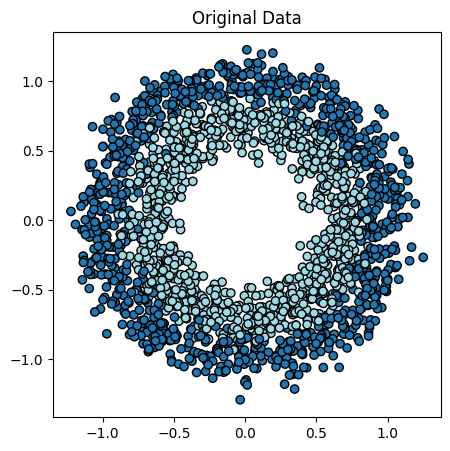

In [3]:
fig, axis = plt.subplots(figsize=(5, 5))
axis.scatter(X[:, 0], X[:, 1], c=y)
axis.set_title("Original Data")

### Scale data:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=random_state
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KPCovC Z: [-0.57953177 -0.74409172 -0.32558949  1.20571211  0.7394902 ]
KPCovC K: [ 1.10966666  0.38086687  0.9290102  -0.99900465 -0.72225708]
KPCovC Z: [-0.58739144 -3.34354683  0.94305102 -4.2868566   1.90572646]
KPCovC K: [ 0.27929354 -0.28560618  0.09009889 -0.06740671  0.0243217 ]
KPCovC Z: [-0.92070401 -1.46518116  1.31028772 -1.72344504  1.29551407]
KPCovC K: [ 0.99266689 -0.03764216  0.26061139 -0.03887931 -0.0491104 ]
KPCovC Z: [   4.53042281  -65.67994147  -57.00001702 -109.05266894  -45.61316822]
KPCovC K: [ 1.07419604  0.70084031  1.04851382 -1.05311745 -0.98105055]


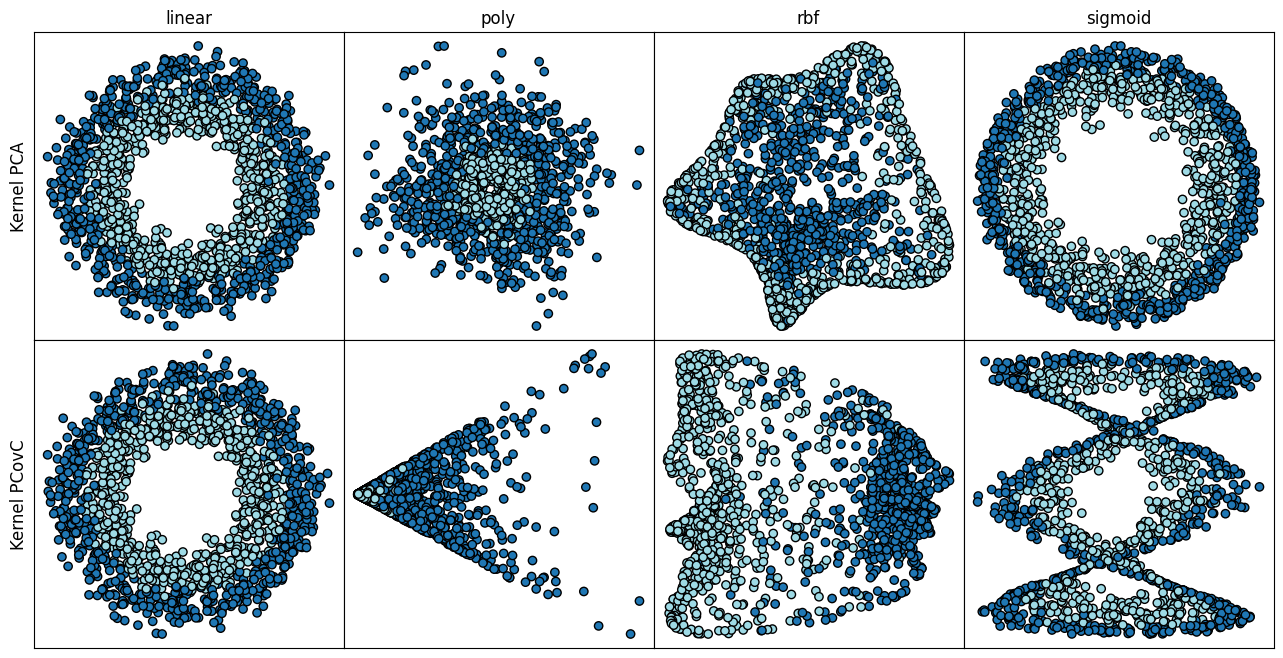

In [ ]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

kernel_params = {"rbf": {"gamma": 7}, "sigmoid": {"gamma": 1.0}, "poly": {"degree": 6}}

fig, axes = plt.subplots(2, len(kernels), figsize=(len(kernels) * 4, 8))

for i, kernel in enumerate(kernels):
    kpca = KernelPCA(
        random_state=random_state,
        n_components=n_components,
        kernel=kernel,
        **kernel_params.get(kernel, {}),
    )
    t_kpca = kpca.fit_transform(X_train_scaled)

    kpcovc = KernelPCovC(
        n_components=n_components,
        mixing=0.1,
        kernel=kernel,
        random_state=random_state,
        **kernel_params.get(kernel, {}),
        center=True,
    )
    t_kpcovc = kpcovc.fit_transform(X_train_scaled, y_train)

    axes[0][i].scatter(t_kpca[:, 0], t_kpca[:, 1], c=y_train)
    axes[1][i].scatter(t_kpcovc[:, 0], t_kpcovc[:, 1], c=y_train)

    kernel_name = kernel.__name__ if callable(kernel) else kernel

    axes[0][i].set_title(kernel_name)

    axes[0][i].set_xticks([])
    axes[1][i].set_xticks([])

    axes[0][i].set_yticks([])
    axes[1][i].set_yticks([])

axes[0][0].set_ylabel("Kernel PCA", fontsize=mpl.rcParams["axes.titlesize"])
axes[1][0].set_ylabel("Kernel PCovC", fontsize=mpl.rcParams["axes.titlesize"])
fig.subplots_adjust(wspace=0, hspace=0)

## Decision Boundary

KPCovC Z: [-0.72962883 -1.89417851  0.9385722  -2.1130997   2.94280556]
KPCovC K: [ 0.99387253 -0.15307415  0.74001849 -0.16415158 -0.21314594]
KPCovC Z: [-0.72844076 -1.88694092  0.95677909 -2.10347779  2.90600369]
KPCovC K: [ 0.99234693 -0.14771025  0.72581619 -0.15504518 -0.20052687]
KPCovC Z: [-0.72747068 -1.87995651  0.96191044 -2.09960812  2.89538188]
KPCovC K: [ 0.99200915 -0.14634643  0.72232696 -0.1529474  -0.19762181]
KPCovC Z: [-0.72638308 -1.87640715  0.96527126 -2.0976865   2.88718018]
KPCovC K: [ 0.99187848 -0.14579998  0.72093792 -0.15212645 -0.19648536]
KPCovC Z: [-0.7263194  -1.87176842  0.96914945 -2.0962232   2.88267457]
KPCovC K: [ 0.99168709 -0.14497989  0.71886142 -0.15091385 -0.19480722]
KPCovC Z: [-0.72383676 -1.85595591  0.98820756 -2.08837609  2.85265572]
KPCovC K: [ 0.99108714 -0.14224883  0.71199984 -0.14702685 -0.1894328 ]
KPCovC Z: [-0.75388318 -1.94025837  1.00012533 -2.12641173  2.5618252 ]
KPCovC K: [ 0.9874143  -0.11732218  0.64792438 -0.11766122 -0.14

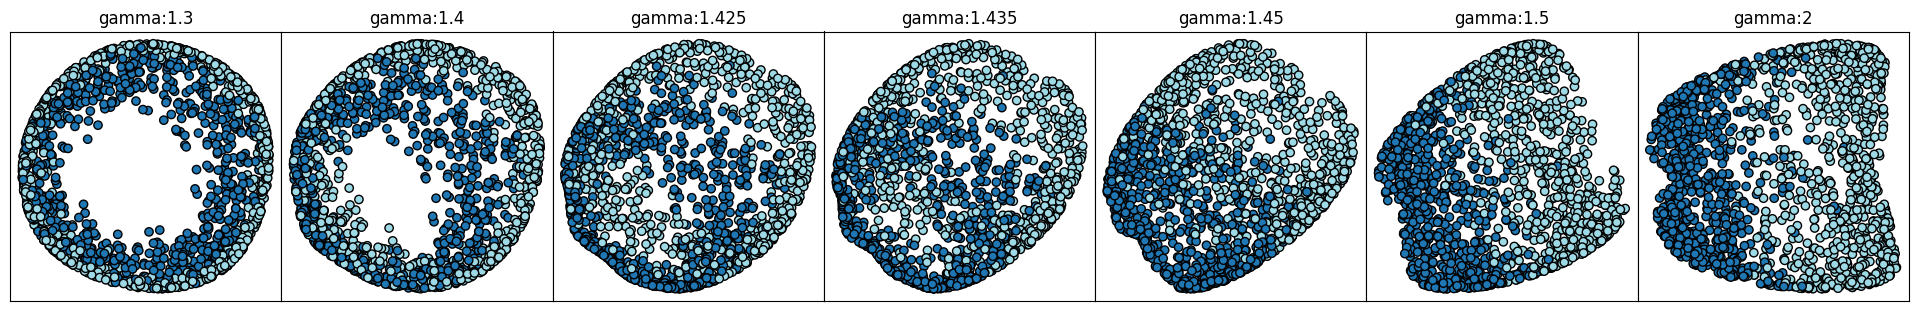

In [6]:
gamma_vals = [1.3, 1.4, 1.425, 1.435, 1.45, 1.5, 2]

fig, axes = plt.subplots(1, len(gamma_vals), figsize=(len(gamma_vals) * 3.5, 3.5))

for i, gamma in enumerate(gamma_vals):
    kpcovc = KernelPCovC(
        n_components=n_components,
        random_state=random_state,
        mixing=0.1,
        center=True,
        kernel="rbf",
        gamma=gamma,
    )
    t_kpcovc = kpcovc.fit_transform(X_train_scaled, y_train)

    axes[i].scatter(t_kpcovc[:, 0], t_kpcovc[:, 1], c=y_train)
    axes[i].set_title(f"gamma:{gamma}")

    axes[i].set_xticks([])
    axes[i].set_yticks([])

fig.subplots_adjust(wspace=0)